# 결정트리


## 공통

In [3]:
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [4]:
from preamble import *

## 연습문제 01

### 연습문제01. load_iris 데이터를 로드하고, 데이터를 탐색하세요.
- 데이터셋의 특성과 타깃(target)의 개수를 확인하세요.
- 각 특성의 기초 통계 정보를 출력하세요.

iris는 전형적인 다중분류 문제  
califonia 집값을 활용한 회귀문제는 오차율이 중요하다.  
기초통계정보를 묻는 것은 dataframe으로 변환할 수 있는가? 하는 문제이다

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

# pandas를 이용해서 단일 데이터로 만들어야
X = pd.DataFrame(iris.data)
X # 이렇게 두면 안 된다
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["target"])

print("특성 : ", len(X), ", 타깃 : ", len(y)) # 속도가 현저히 느리니까 그냥 쓰지마
print(f"특성 : {len(X)}, 타깃 : {len(y)}")
print("기초 통계 :\n")
X.describe()

특성 :  150 , 타깃 :  150
특성 : 150, 타깃 : 150
기초 통계 :



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### 연습문제01-2. 데이터를 학습 데이터와 테스트 데이터로 나누세요.
- 학습 데이터와 테스트 데이터의 크기를 출력하세요.
    - 데이터 분할은 train_test_split 함수를 사용하세요.
    - 학습 데이터와 테스트 데이터의 비율은 80:20으로 설정하세요.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) # 은하수를 여행하는 히치하이커에 42가 나옴
# 여기까지 데이터 전처리 혹은 클리닝 작업이라고 한다.

### 연습문제01-3. DecisionTreeClassifier를 사용하여 모델을 생성하세요.
- 학습 데이터를 사용하여 모델을 학습시키세요.
- 학습 완료 후, 학습 데이터에 대한 정확도를 출력하세요

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(f"학습 데이터에 대한 정확도 : {dt.score(X_train, y_train)}")

학습 데이터에 대한 정확도 : 1.0


### 연습문제04. 학습된 모델을 사용하여 테스트 데이터를 예측하세요.
- 테스트 데이터에 대한 정확도를 출력하세요.
- classification_report를 사용하여 평가 결과를 상세히 출력하세요.

In [35]:
# print(f"테스트 데이터에 대한 정확도 : {dt.score(X_test, y_test)}") # 이게 맞지만
from sklearn.metrics import accuracy_score, classification_report
y_pred = dt.predict(X_test)
print(f"테스트 데이터에 대한 정확도 : {accuracy_score(y_pred, y_test)}")
print(classification_report(y_pred, y_test, target_names=iris.target_names))

테스트 데이터에 대한 정확도 : 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.86      0.92         7
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



나의 예측에 대한 척도
precision : 정밀도     
recall : 재현율

### 연습문제05. 학습된 결정 트리를 시각화하세요.
- plot_tree 함수를 사용하여 결정 트리의 구조를 그리세요.
- 트리 시각화를 통해 어떤 특성이 중요한지 설명하세요.

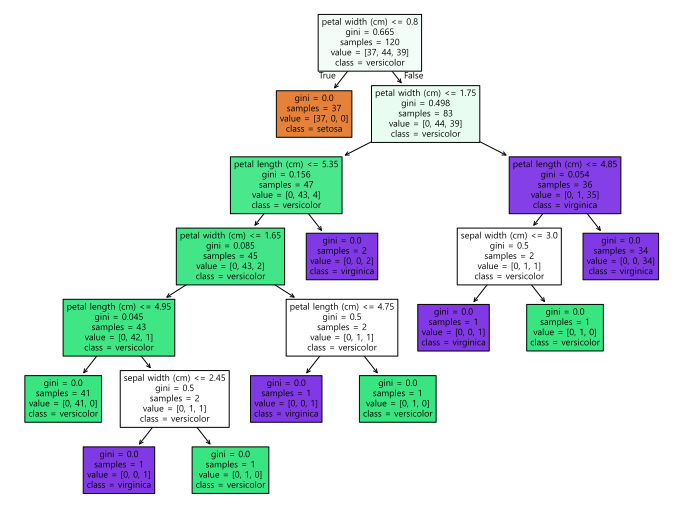

[0.    0.025 0.08  0.895]


In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 9))
plot_tree(dt, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True)
plt.show()
print(dt.feature_importances_)